In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# some analysis on oject type data

In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

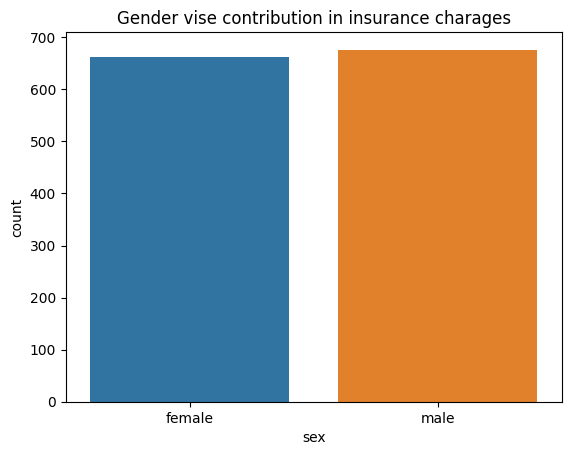

In [8]:
p=sns.countplot(x=df['sex'])
plt.title('Gender vise contribution in insurance charages')
plt.savefig('gender_contribution.png',dpi=100)

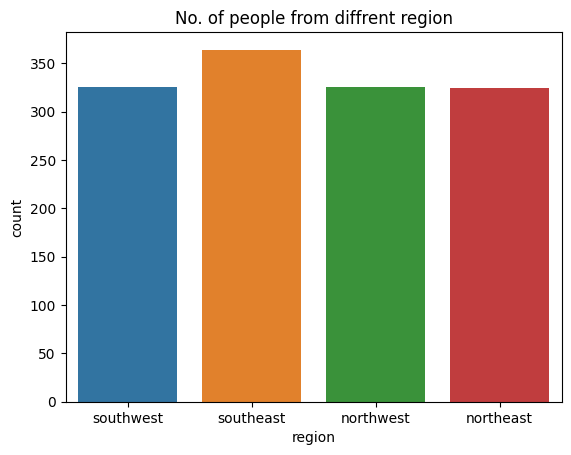

In [9]:
sns.countplot(x=df['region'])
plt.title('No. of people from diffrent region')
plt.show()

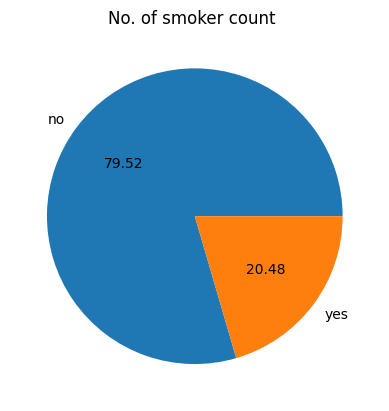

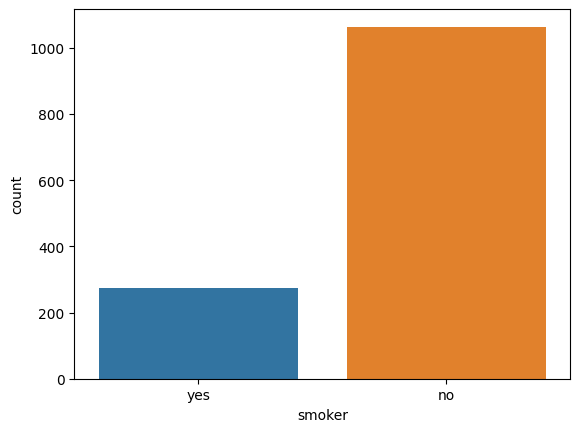

In [10]:
df.groupby('smoker').size().plot(kind='pie',autopct='%.2f')
plt.title('No. of smoker count ')
plt.show()
sns.countplot(x=df['smoker'])
plt.show()

# Now focus on numerical Data

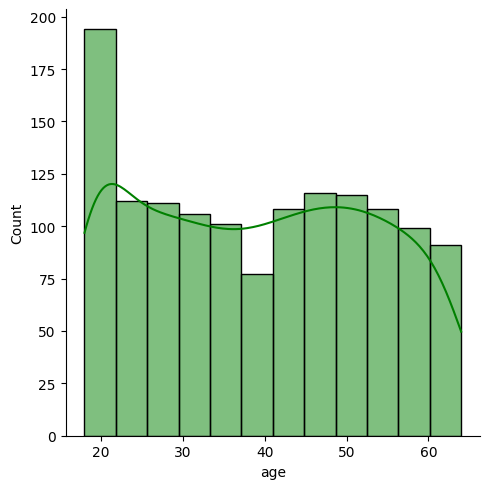

In [11]:
sns.displot(x='age',data=df,color='g',kde=True)
plt.show()

<AxesSubplot: xlabel='age', ylabel='count'>

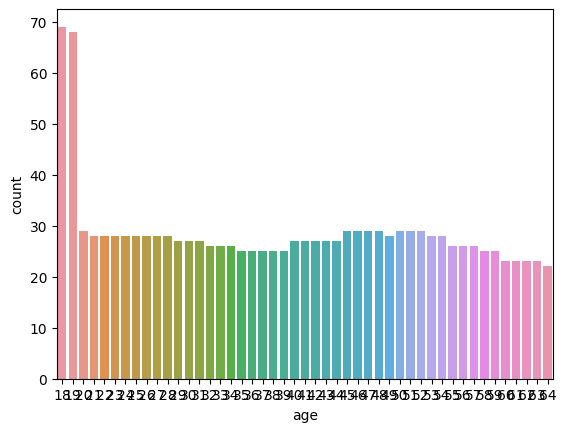

In [12]:
sns.countplot(x=df['age'])


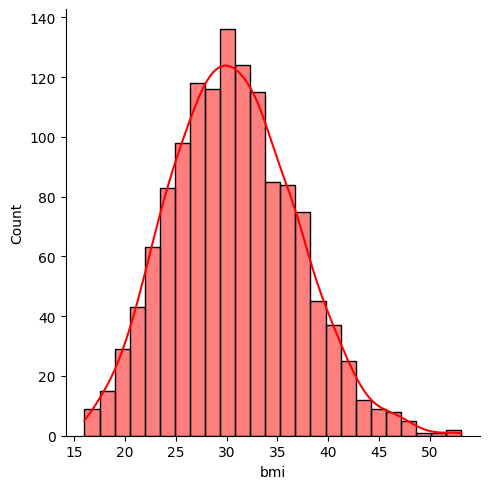

In [13]:
sns.displot(x=df['bmi'],kde=True,color='r')

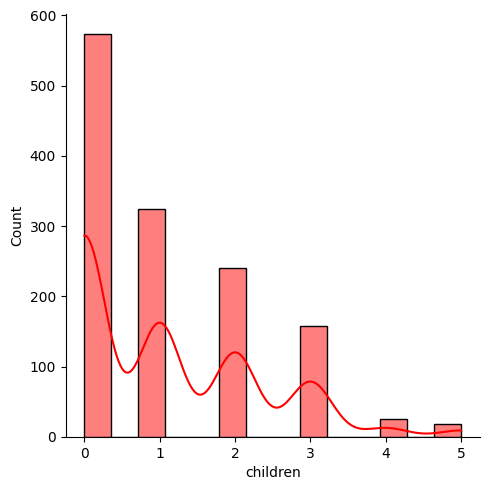

In [14]:
sns.displot(x=df['children'],color='r',kde=True)

<AxesSubplot: xlabel='children', ylabel='count'>

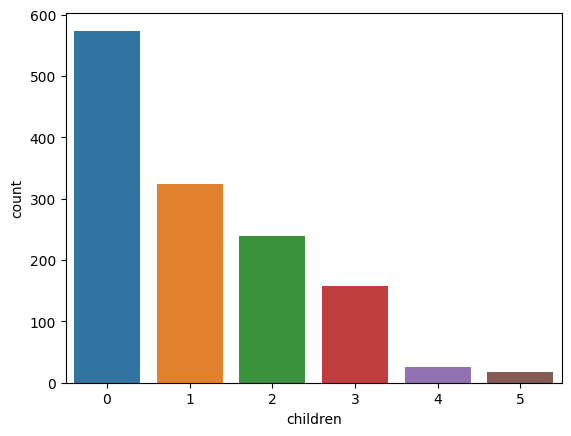

In [15]:
sns.countplot(x=df['children'])

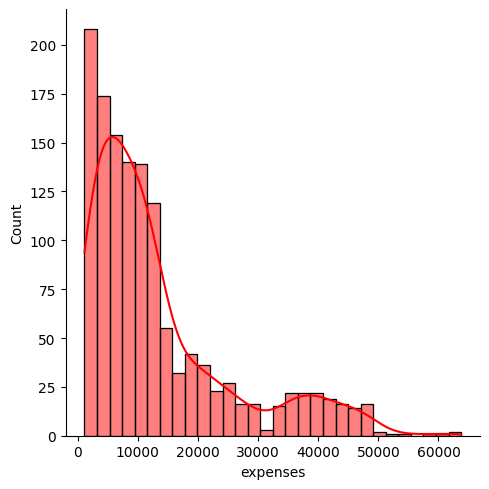

In [16]:
sns.displot(x=df['expenses'],kde=True,color='r')

<AxesSubplot: xlabel='age', ylabel='expenses'>

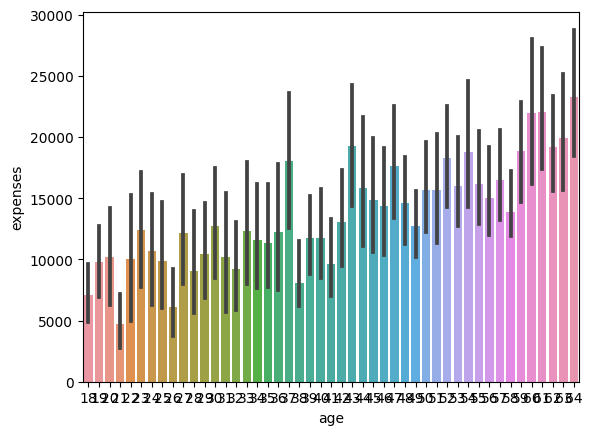

In [17]:
sns.barplot(x='age',y='expenses',data=df)

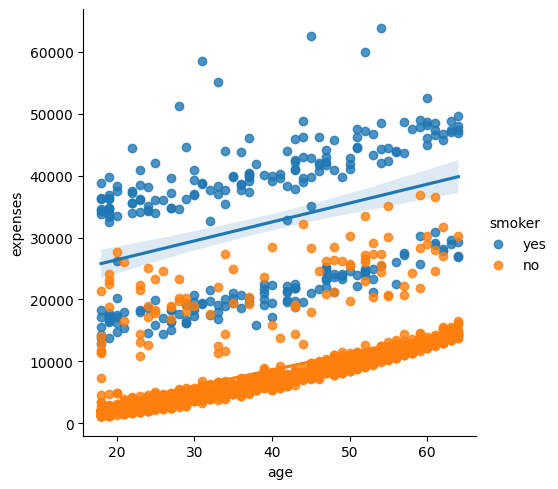

In [18]:
sns.lmplot(x='age',y='expenses',hue='smoker',data=df)

<AxesSubplot: xlabel='region', ylabel='expenses'>

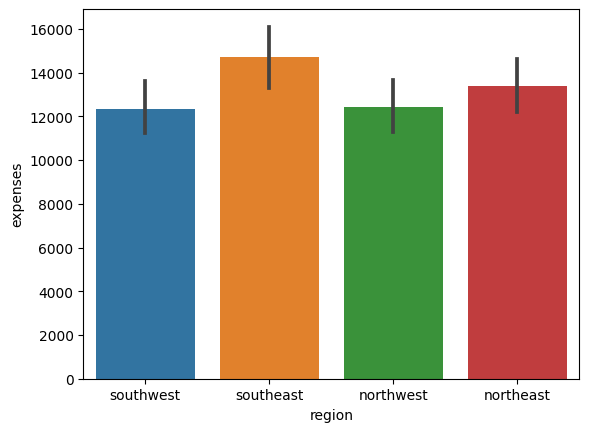

In [19]:
sns.barplot(x='region',y='expenses',data=df)

In [20]:
df.groupby('region')['expenses'].max().sort_values()

region
southwest    52590.83
northeast    58571.07
northwest    60021.40
southeast    63770.43
Name: expenses, dtype: float64

<AxesSubplot: xlabel='children', ylabel='expenses'>

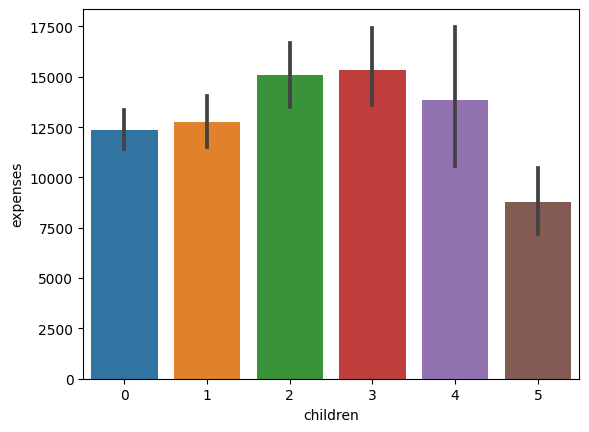

In [21]:
sns.barplot(x='children',y='expenses',data=df)

In [22]:
df.loc[df['expenses']==df['expenses'].max(),'age']

543    54
Name: age, dtype: int64

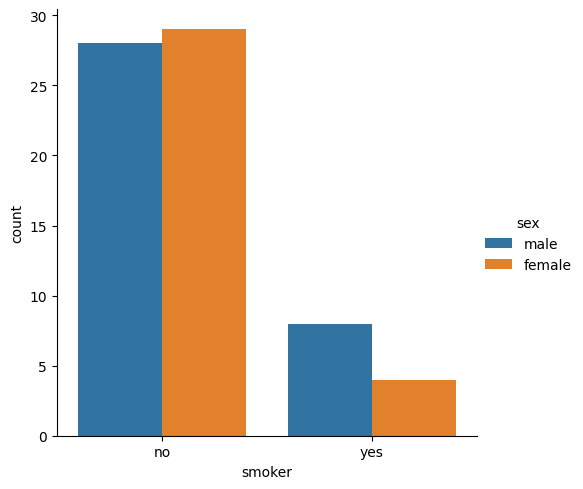

In [23]:
sns.catplot(x='smoker',kind='count',hue='sex',data=df[df['age']==18])

<AxesSubplot: xlabel='sex', ylabel='expenses'>

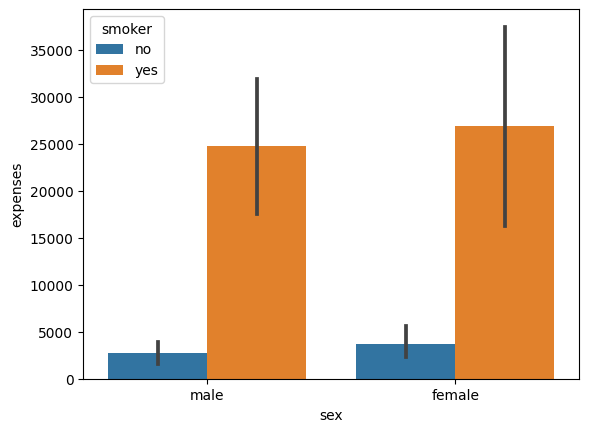

In [24]:
sns.barplot(x='sex',y='expenses',hue='smoker',data=df[df['age']==18])

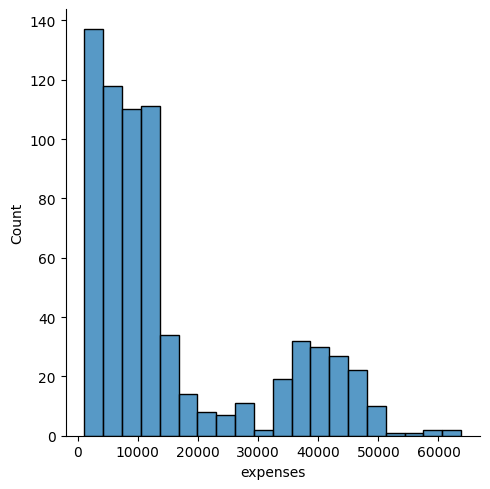

In [25]:
sns.displot(x=df[df['bmi']>30]['expenses'])

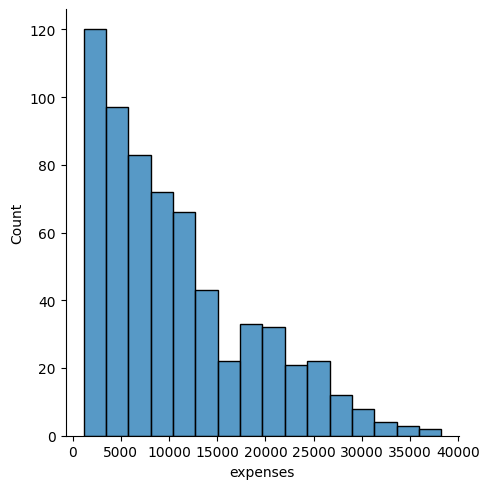

In [26]:
sns.displot(x=df[df['bmi']<=30]['expenses'])

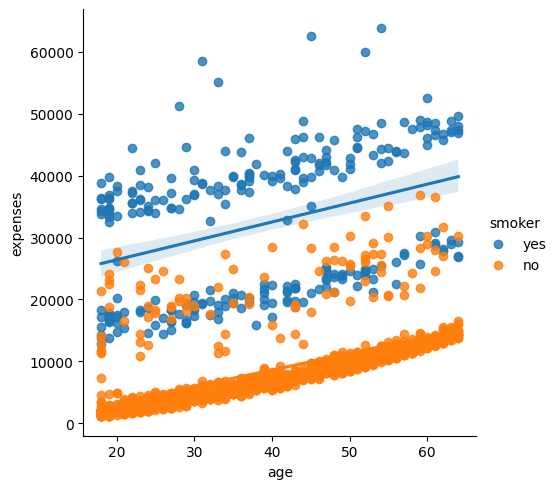

In [27]:
sns.lmplot(x='age',y='expenses',hue='smoker',data=df)

In [28]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [29]:
#categorical_feature=[features for features in df.columns if df[features].dtypes=='object']
#categorical_feature


In [30]:
# use odinal encoder to conver oject type to numerical

In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder=OrdinalEncoder()

In [32]:
enc=OrdinalEncoder(dtype=int)
df[['sex','region','smoker']]=enc.fit_transform(df[['sex','region','smoker']])


In [33]:
df['region'].unique()

array([3, 2, 1, 0])

In [34]:
df['sex'].unique()

array([0, 1])

# now thik about feature selection

In [35]:
df.corr()['expenses'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198576
age         0.299008
smoker      0.787251
expenses    1.000000
Name: expenses, dtype: float64

<AxesSubplot: >

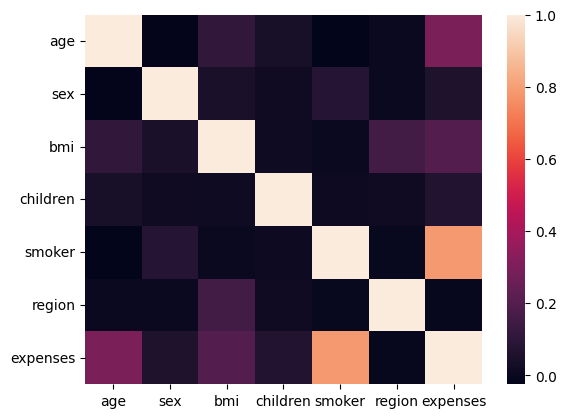

In [36]:
sns.heatmap(df.corr())

In [37]:
 from sklearn.feature_selection import VarianceThreshold
v_thr=VarianceThreshold(threshold=0)
v_thr.fit(df)

VarianceThreshold(threshold=0)

In [38]:
v_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [39]:
df_new=df.loc[:,['age','smoker','bmi','expenses']]

In [40]:
df_new.head()

,age,smoker,bmi,expenses
0,19,1,27.9,16884.92
1,18,0,33.8,1725.55
2,28,0,33.0,4449.46
3,33,0,22.7,21984.47
4,32,0,28.9,3866.86


In [41]:
df_new.to_csv('selected_feature.csv')

# model creation part start

In [42]:
x=df_new.drop(['expenses'],axis=1)
y=df_new['expenses']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [44]:
# applyn linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

# prediction
y_pred_lr=lr.predict(x_test)

# chek cost error and r_square
from sklearn import metrics
score_lr = metrics.r2_score(y_test,y_pred_lr)
cost_lr = metrics.mean_absolute_error(y_test,y_pred_lr)
print(score_lr,cost_lr)

0.777673755514819 4261.0616108182785


In [45]:
# for  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

# prediction
y_pred_gr=gr.predict(x_test)

# chek cost error and r_square
from sklearn import metrics
score_gr = metrics.r2_score(y_test,y_pred_gr)
cost_gr = metrics.mean_absolute_error(y_test,y_pred_gr)
print(score_gr,cost_gr)

0.8693065308401521 2561.4263965822042


In [46]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

# prediction
y_pred_rf=rf.predict(x_test)

# chek cost error and r_square
from sklearn import metrics
score_rf = metrics.r2_score(y_test,y_pred_rf)
cost_rf = metrics.mean_absolute_error(y_test,y_pred_rf)
print(score_rf,cost_rf)

0.8340068340693303 2799.162582388948


In [47]:
# svm
from sklearn.svm import SVR


svm = SVR()
svm.fit(x_train,y_train)

# prediction
y_pred_svm=svm.predict(x_test)

# chek cost error and r_square
from sklearn import metrics
score_svm = metrics.r2_score(y_test,y_pred_svm)
cost_svm = metrics.mean_absolute_error(y_test,y_pred_svm)
print(score_svm,cost_svm)

-0.07186226515961147 8574.866806765442


# give some visuals on predicted and actul Data

In [48]:
df_pred=pd.DataFrame({'Actual':y_test,'lr':y_pred_lr,'svm':y_pred_svm,
                    'rf':y_pred_rf,'gr':y_pred_gr})

In [49]:
df_pred.head(3)

,Actual,lr,svm,rf,gr
764,9095.07,8190.940247,9535.675826,9307.747200,10014.954687
887,5272.18,7424.041883,9454.022118,5355.260083,6825.046467
890,29330.98,37349.191333,9668.565437,28366.228800,29082.583715


#### plt.subplot(221)
plt.plot(df_pred['Actual'].iloc[:11],label='Acutal')
plt.plot(df_pred['lr'].iloc[:11],label="LR")
plt.legend()

plt.subplot(222)
plt.plot(df_pred['Actual'].iloc[:11],label='Acutal')
plt.plot(df_pred['svm'].iloc[:11],label="SVM")
plt.legend()


plt.subplot(223)
plt.plot(df_pred['Actual'].iloc[:11],label='Acutal')
plt.plot(df_pred['rf'].iloc[:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df_pred['Actual'].iloc[:11],label='Acutal')
plt.plot(df_pred['gr'].iloc[:11],label="gr")
plt.legend()
plt.tight_layout()# this remove possible overlap of legend and graph
plt.show()

Hence finally I move ahead with GradientBoostingRegressor model for more 
accuret pridiction That allready clear in above visualization

# Ushing Joblib make model usable all time

In [50]:
import joblib

joblib.dump(gr,'insurance_gr_joblib')

['insurance_gr_joblib']

In [51]:
model=joblib.load('insurance_gr_joblib')

In [52]:
model.predict([[40,1,40.30]])

C:\python3.10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([43128.90433543])

# outer ditection during the preprocessing

<AxesSubplot: xlabel='expenses'>

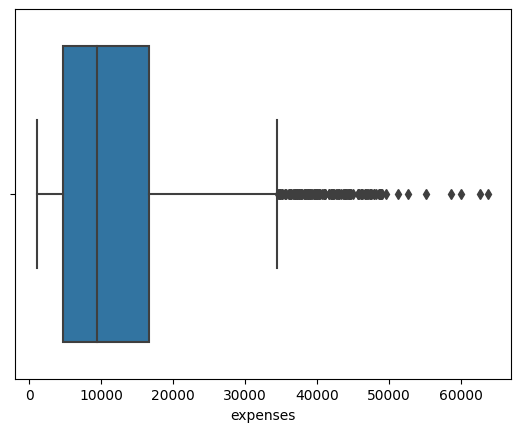

In [53]:


sns.boxplot(x=df['expenses'] )

<AxesSubplot: xlabel='age'>

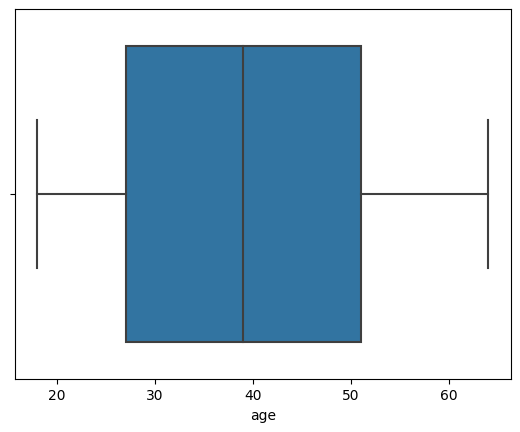

In [54]:
sns.boxplot(x=df['age'] )

<AxesSubplot: xlabel='bmi'>

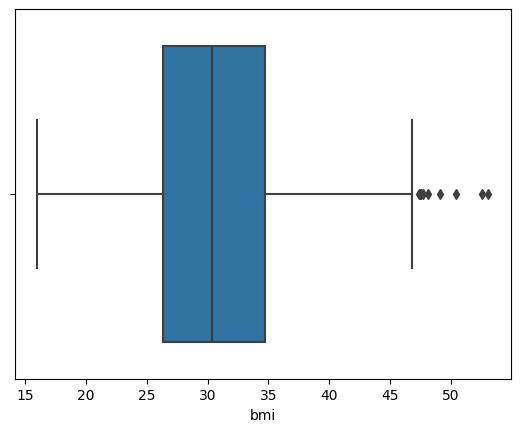

In [55]:
sns.boxplot(x=df['bmi'] )

In [56]:
df_n=df[df['expenses']<35000]
df_n=df[df['bmi']<47]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [58]:
df.shape

(1338, 7)

In [59]:
x_train

,age,smoker,bmi
560,46,0,20.0
1285,47,0,24.3
1142,52,0,24.9
969,39,0,34.3
486,54,0,21.5
...,...,...,...
1095,18,0,31.4
1130,39,0,23.9
1294,58,0,25.2
860,37,1,47.6


In [60]:
y_train

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64

In [61]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(x_test)

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler


In [63]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Creataing model

In [64]:
model=Sequential([
    Dense(3,activation='relu',name='Input_layer'),
   
    Dense(1,activation='linear'),
])

In [65]:
model.compile(optimizer='sgd',loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
hist = model.fit(x_train, y_train,
          batch_size=40, epochs=100,
         )

Epoch 1/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4375 - accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4375 - accuracy: 0.0000e+00
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4375 - accuracy: 0.0000e+00
Epoch 10/100
27/27 

27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 76/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 77/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 78/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 79/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 80/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4375 - accuracy: 0.0000e+00
Epoch 81/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 82/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4531 - accuracy: 0.0000e+00
Epoch 83/100
27/27 [==============================] - 0s 3ms/step - loss: -203502.4375 - accuracy: 0.0000e+00
Epoch 84/100
27/27 [===

In [74]:
model.evaluate(x_test, y_test)[1]

9/9 [==============================] - 0s 2ms/step - loss: -339.9954 - accuracy: 0.0672


0.06716418266296387

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 3)                 12        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [69]:
import tensorflow as tf

In [70]:
a=tf.ones((1,4))

In [71]:
a

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[1., 1., 1., 1.]], dtype=float32)>

In [72]:
len(model.weights)

4